In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from matplotlib.collections import LineCollection
import datetime as dt
from matplotlib.colors import ListedColormap, BoundaryNorm
import datetime

In [3]:
df_isf = pd.read_csv('~/Documents/Python/All_hourly_summaries.csv')

In [4]:
df_sw = pd.read_json ('~/Documents/Python/sheungwan.json')

In [5]:
df_weather = pd.read_json ('~/Documents/Python/weather.json')

In [6]:
df_weather['second']=[x.get('seconds') for x in df_weather['timestamp']]

In [7]:
df_weather['datetime'] = pd.to_datetime(df_weather['second'], unit ='s')

In [8]:
df_weather['date'] = pd.to_datetime(df_weather['datetime']).dt.date

In [9]:
df_sw['temperature']=[x.get('main').get('temp') for x in df_sw['list']]

In [10]:
df_sw['unixdate']=[x.get('dt') for x in df_sw['list']] 

In [11]:
df_sw['datetime'] = pd.to_datetime(df_sw['unixdate'], unit ='s')

In [12]:
df_sw['date'] = pd.to_datetime(df_sw['datetime']).dt.date

In [13]:
df_sw['Temperature'] = df_sw['temperature'] - 273.15 

In [14]:
df_sw['temperature'] = df_sw['Temperature'] 

In [15]:
df_isf['date'] = [datetime.datetime.strptime(x, '%d/%m/%Y').date() for x in df_isf['Date']]

In [16]:
df_isf['temperature'] = df_isf['Temperature']

Text(0, 0.5, 'Temperature')

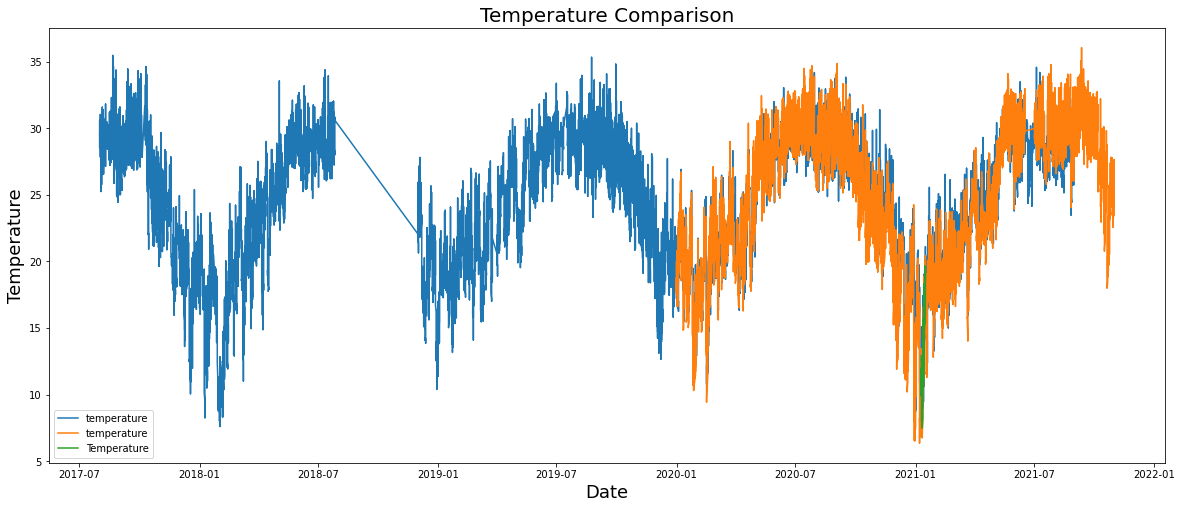

In [20]:
ax = df_isf.plot(x='date',y='temperature',figsize=(20,8))
df_weather.plot(x='date',y='temperature', ax=ax)
df_sw.plot(x='date',y='Temperature', ax=ax)

ax.set_title('Temperature Comparison',fontsize = 20)
ax.set_xlabel('Date', fontsize = 18)
ax.set_ylabel('Temperature', fontsize = 18)

In [21]:
df_sw['unixdate']=[x.get('dt') for x in df_sw['list']]

In [22]:
df_sw['datetime'] = pd.to_datetime(df_sw['unixdate'], unit ='s')

In [23]:
df_sw['date'] = pd.to_datetime(df_sw['datetime']).dt.date

In [24]:
df_sw['name'] = 'SheungWan'

In [25]:
df_sw1 = df_sw.groupby('name').agg({'Temperature': ['mean','median', 'max', 'min','std' ]})

In [26]:
df_isf['name'] = 'ISF'

In [27]:
df_isf1 = df_isf.groupby('name').agg({'Temperature': ['mean','median', 'max', 'min','std' ]})

In [28]:
df_weather['name'] = 'Weather'

In [29]:
df_weather['Temperature'] = df_weather['temperature']

In [30]:
df_weather1 = df_weather.groupby('name').agg({'Temperature': ['mean','median', 'max', 'min','std' ]})

In [31]:
df_combine = df_sw1.append(df_isf1)

In [32]:
df_combine1 = df_combine.append(df_weather1)

In [33]:
df_combine1

Temperature                                      
                 mean   median      max       min       std
name                                                       
SheungWan   12.931905  12.2950  19.6600  7.490000  3.231155
ISF         24.217448  25.0935  35.4675  7.609167  4.950252
Weather     25.713919  27.5200  36.0500  6.370000  5.141850

In [34]:
df_isf['humidity'] = df_isf['Rel._Humidity']

In [35]:
df_sw['humidity']=[x.get('main').get('humidity') for x in df_sw['list']]

Text(0, 0.5, 'Humidity')

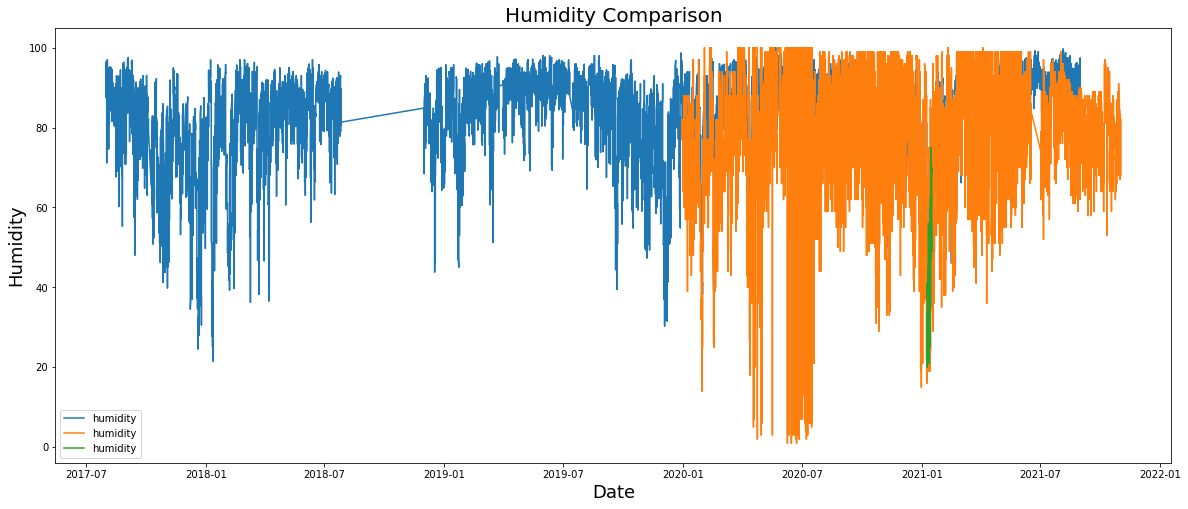

In [36]:
ax = df_isf.plot(x='date',y='humidity',figsize=(20,8))
df_weather.plot(x='date',y= 'humidity', ax=ax)
df_sw.plot(x='date',y='humidity', ax=ax)

ax.set_title('Humidity Comparison',fontsize = 20)
ax.set_xlabel("Date", fontsize = 18)
ax.set_ylabel("Humidity", fontsize = 18)

In [37]:
df_sw2 = df_sw.groupby('name').agg({'humidity': ['mean','median', 'max', 'min','std' ]})

In [38]:
df_isf2 = df_isf.groupby('name').agg({'humidity': ['mean','median', 'max', 'min','std' ]})

In [39]:
df_weather2 = df_weather.groupby('name').agg({'humidity': ['mean','median', 'max', 'min','std' ]})

In [40]:
df_humidity_combine = df_sw2.append(df_isf2)

In [41]:
df_humidity_combine1 = df_humidity_combine.append(df_weather2)

In [42]:
df_humidity_combine1

humidity                                        
                mean     median    max        min        std
name                                                        
SheungWan  44.494048  42.500000   75.0  20.000000  13.061346
ISF        83.059425  86.466667  100.0  21.484667  11.449247
Weather    79.503109  82.000000  100.0   1.000000  15.387011

In [43]:
df_isf['windchill'] = df_isf['Scalar_av_wind_speed']

In [44]:
df_sw['windchill']=[x.get('wind').get('speed') for x in df_sw['list']]

Text(0, 0.5, 'Windchill')

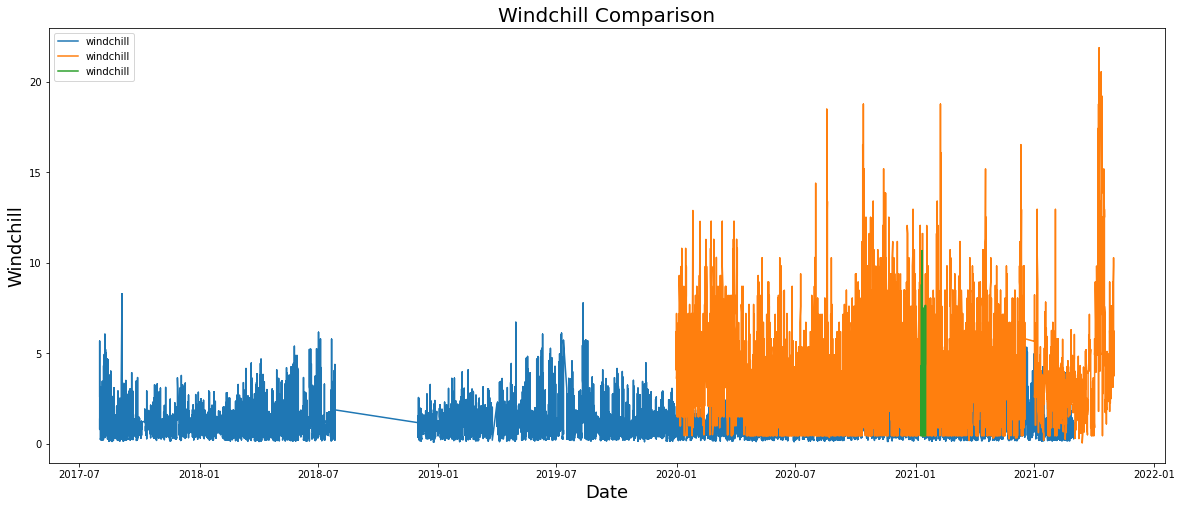

In [45]:
ax = df_isf.plot(x='date',y= 'windchill',figsize=(20,8))
df_weather.plot(x='date',y='windchill', ax=ax)
df_sw.plot(x='date',y='windchill', ax=ax)

ax.set_title('Windchill Comparison',fontsize = 20)
ax.set_xlabel("Date", fontsize = 18)
ax.set_ylabel("Windchill", fontsize = 18)

In [46]:
df_sw3 = df_sw.groupby('name').agg({'windchill': ['mean','median', 'max', 'min','std' ]})

In [47]:
df_isf3 = df_isf.groupby('name').agg({'windchill': ['mean','median', 'max', 'min','std' ]})

In [48]:
df_weather3 = df_weather.groupby('name').agg({'windchill': ['mean','median', 'max', 'min','std' ]})

In [49]:
df_windchill_combine = df_sw3.append(df_isf3)

In [50]:
df_windchill_combine1 = df_windchill_combine.append(df_weather3)

In [51]:
df_windchill_combine1

windchill                                         
               mean    median        max       min       std
name                                                        
SheungWan  2.423571  2.430000  10.680000  0.450000  1.906229
ISF        1.146518  0.924417   8.299833  0.085167  0.879336
Weather    4.083090  3.700000  21.900000  0.040000  2.492457

In [52]:
df_isf["temp_difference"] = df_isf['temperature'] - df_weather['temperature']

In [53]:
df_isf['windchill_difference'] = df_isf['windchill'] - df_weather['windchill']

In [54]:
df_isf['humidity_difference'] = df_isf['humidity'] - df_weather['humidity']

Text(0.5, 1.0, 'Temperature Difference')

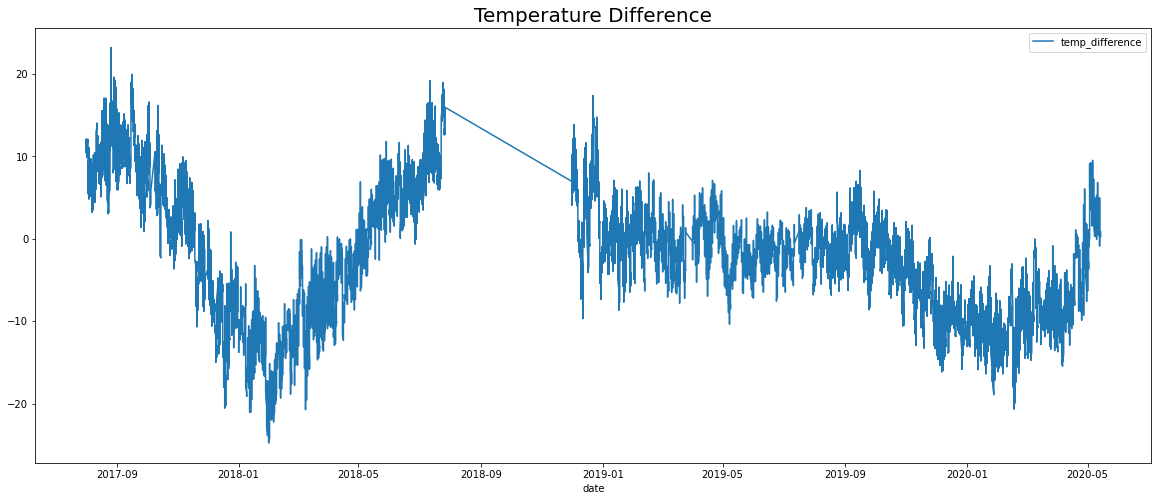

In [58]:
ax = df_isf.plot(x='date',y='temp_difference',figsize=(20,8))
ax.set_title('Temperature Difference',fontsize = 20)

Text(0.5, 1.0, 'Windchill Difference')

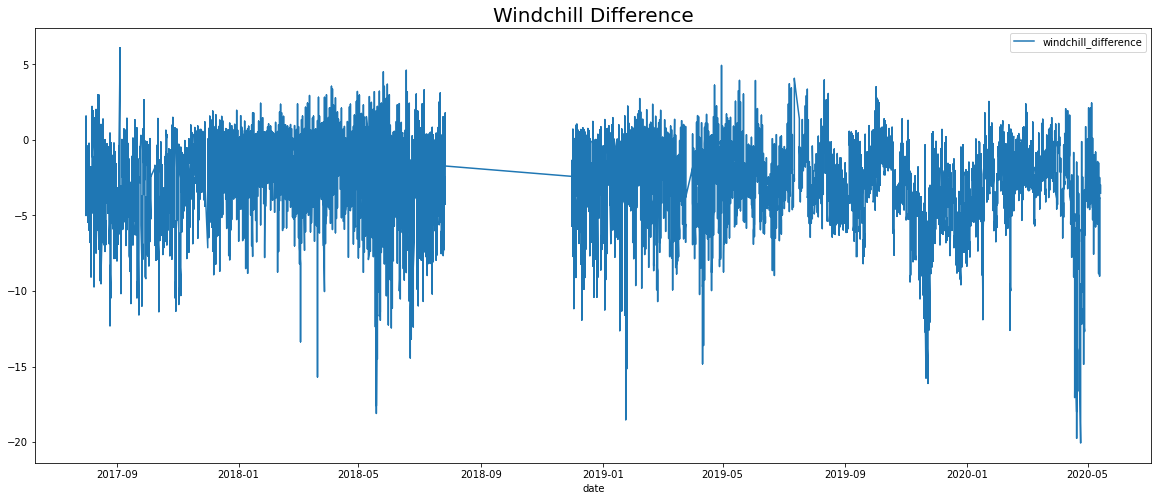

In [61]:
ax = df_isf.plot(x='date',y='windchill_difference',figsize=(20,8))
ax.set_title('Windchill Difference',fontsize = 20)

Text(0.5, 1.0, 'Humidity Difference')

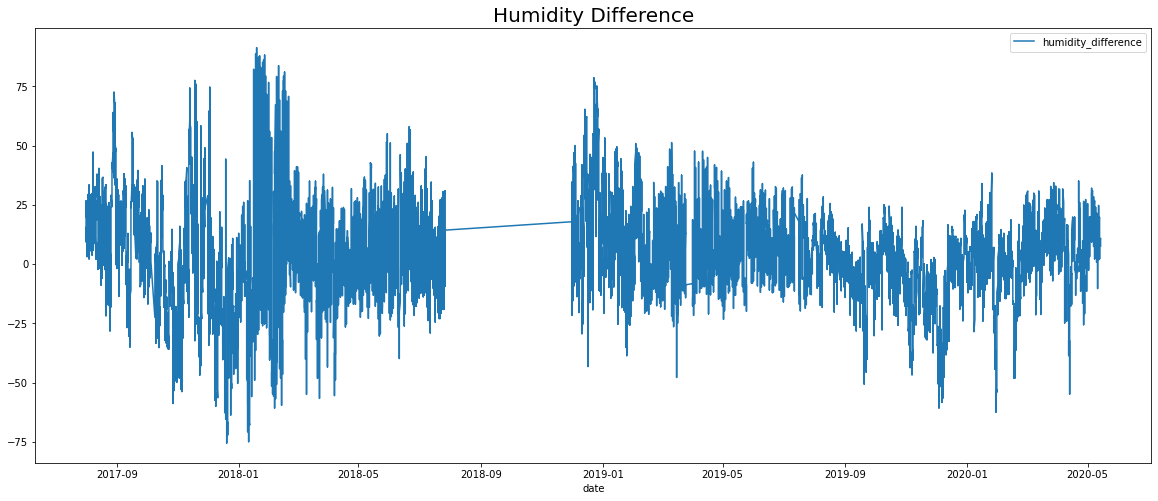

In [62]:
ax = df_isf.plot(x='date',y='humidity_difference',figsize=(20,8))
ax.set_title('Humidity Difference',fontsize = 20)